In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
users = pd.read_csv('../data/raw/takehome_users.csv', index_col='object_id', encoding='latin-1')

In [3]:
users.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
object_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [27]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 11 columns):
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
adopted_user                  12000 non-null int64
invited_by_adopted_user       12000 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 1.4+ MB


In [5]:
engagement = pd.read_csv('../data/raw/takehome_user_engagement.csv',
                         parse_dates=['time_stamp'],
                         index_col='time_stamp')

In [111]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207917 entries, 2014-04-22 03:53:30 to 2014-01-26 08:57:12
Data columns (total 2 columns):
user_id    207917 non-null int64
visited    207917 non-null int64
dtypes: int64(2)
memory usage: 4.8 MB


In [6]:
adoption = engagement.sort_index().groupby('user_id').rolling('7D').visited.sum()

In [7]:
    adopted_users = adoption[adoption >= 3].index.get_level_values(0).unique().to_numpy()

In [8]:
users['adopted_user'] = 0
users.loc[adopted_users, 'adopted_user'] = 1

In [77]:
# Base Adoption Rate

num_users = users.size
num_adopted_users = users[users.adopted_user == 1].size

num_adopted_users / num_users

0.1335

In [80]:
# Adoption Rate when on the Mailing List

num_mailing_list = users[users.opted_in_to_mailing_list == 1].size
num_adopted_mailing_list = users[(users.adopted_user == 1) & (users.opted_in_to_mailing_list == 1)].size

num_adopted_mailing_list / num_mailing_list

0.13827655310621242

In [81]:
# Adoption Rate when Enabled for Marketing Drip

num_marketing = users[users.enabled_for_marketing_drip == 1].size
num_adopted_marketing = users[(users.adopted_user == 1) & (users.enabled_for_marketing_drip == 1)].size

num_adopted_marketing / num_marketing

0.13727678571428573

In [12]:
users['invited_by_adopted_user'] = users.invited_by_user_id.apply(lambda x: users.loc[x].adopted_user == 1 \
                                                                                if not np.isnan(x) else False)
users['invited_by_adopted_user'] = users['invited_by_adopted_user'].astype(int)

In [78]:
# Adoption Rate when invited by an Adopted User

num_invited_by_adopted_users = users[users.invited_by_adopted_user == 1].size
num_adopted_users_invited_by_adopted_users = users[(users.adopted_user == 1) & (users.invited_by_adopted_user == 1)].size

num_adopted_users_invited_by_adopted_users / num_invited_by_adopted_users

0.2056932966023875

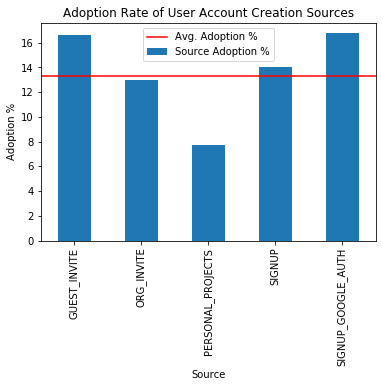

In [99]:
sources = users.groupby('creation_source')
adoption_rate = sources.adopted_user.sum() / sources.adopted_user.size() * 100
adoption_rate.plot(kind='bar', label='Source Adoption %')
plt.axhline(13.35, c='r', label='Avg. Adoption %')
plt.title('Adoption Rate of User Account Creation Sources')
plt.xlabel('Source')
plt.ylabel('Adoption %')
_ = plt.legend()

In [92]:
users['email_host'] = users.email.str.split('@').apply(lambda x: x[1])

In [105]:
users.email_host.value_counts()[:10]

gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
gustr.com         1179
hotmail.com       1165
mumdc.com            2
dqwln.com            2
xvnbr.com            2
oqpze.com            2
Name: email_host, dtype: int64

In [107]:
common_hosts = ['gmail.com', 'yahoo.com', 'jourrapide.com', 'cuvox.de', 'gustr.com', 'hotmail.com']

users.email_host = users.email_host.apply(lambda x: x if x in common_hosts else 'other')

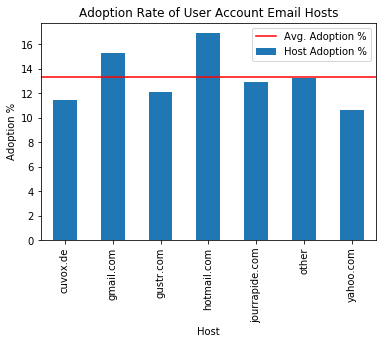

In [108]:
hosts = users.groupby('email_host')
adoption_rate = hosts.adopted_user.sum() / hosts.adopted_user.size() * 100
adoption_rate.plot(kind='bar', label='Host Adoption %')
plt.axhline(13.35, c='r', label='Avg. Adoption %')
plt.title('Adoption Rate of User Account Email Hosts')
plt.xlabel('Host')
plt.ylabel('Adoption %')
_ = plt.legend()

In [ ]:
users.to_csv('../data/clean/users.csv')